<a href="https://colab.research.google.com/github/johnowusuduah/portfolio/blob/main/logistic_regression_maternal_smoking_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Modeling of Associative Relationship Between Chances of Giving Birth to Premature Babies and Smoking Habits of Mothers in R

## Introduction

Fifty years ago it was not trite knowledge that pregnant women could expose their unborn children to untold harm by smoking. The Child Health and Development Studies carried out a thorough study of babies born at the Kaiser Foundational Hospital in Oakland, California between 1960 and 1967. The smoking habits, along with socioeconomic, biographic and demographic conditions of the respondents were recorded and collated in a data set, which is the source of our statistical analysis. 

We would like to determine if there is association between odds of giving birth to premature babies and maternal smoking behavior. We would also like to find out the likely range for the odds ratio of pre-term birth for mothers who smoke versus mothers who do not smoke. Thirdly, we would also investigate if race significantly affects the association between smoking and odds of giving birth to premature babies.And finally, we will explore other interesting associations with the odds of pre-term birth that are note worthy.



## Exploratory Data Analysis (EDA)

Our data set was the clean version of the original data set called "smoking.csv". Our response variable, which is the gestational period of babies was converted into a binary categorical variable with 270 days being the critical threshold, before a logistic regression analysis was carried out. The continuous predictor variables in data set were centered from the get-go to preemptively handle multicollinearity which logistic regression models are sensitive to. 

Load necessary packages

In [45]:
library(ggplot2)
library(MASS)

In [46]:
babies <- read.csv("https://raw.githubusercontent.com/johnowusuduah/portfolio/main/smoking.csv", stringsAsFactor = FALSE, header = TRUE)
babies$mrace[(babies$mrace >= 0) & (babies$mrace <= 5)] <- 0
babies$gestation[(babies$gestation < 270)] <- 1
babies$gestation[(babies$gestation >= 270)] <- 0
babies$med[(babies$med == 7)] <- 6
babies$mrace <- factor(babies$mrace)
babies$gestation <- factor(babies$gestation)
babies$med <- factor(babies$med)
babies$inc <- factor(babies$inc)
babies$smoke <- factor(babies$smoke)
babies$gestation_condition <- factor(babies$gestation, levels=c(0,1),labels=c("Not Preterm","Preterm"))
babies$mage_c <- c(scale(babies$mage, scale=F))
babies$mht_c <- c(scale(babies$mht, scale=F))
babies$mpregwt_c <- c(scale(babies$mpregwt, scale=F))
#table(babies$parity)
str(babies)

'data.frame':	869 obs. of  16 variables:
 $ id                 : int  4604 7435 7722 2026 3553 3491 6757 6153 8187 8403 ...
 $ date               : int  1598 1527 1563 1503 1638 1705 1444 1405 1669 1669 ...
 $ gestation          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ bwt.oz             : int  116 110 55 132 105 85 97 129 63 128 ...
 $ parity             : int  7 7 11 4 4 7 0 3 0 0 ...
 $ mrace              : Factor w/ 5 levels "0","6","7","8",..: 3 3 3 3 3 3 2 3 1 3 ...
 $ mage               : int  28 27 35 28 34 33 26 24 24 17 ...
 $ med                : Factor w/ 7 levels "0","1","2","3",..: 2 2 4 3 4 2 6 5 6 2 ...
 $ mht                : int  66 64 65 67 61 67 65 66 58 64 ...
 $ mpregwt            : int  135 133 140 148 130 130 112 135 99 126 ...
 $ inc                : Factor w/ 10 levels "0","1","2","3",..: 3 2 7 4 4 3 7 2 8 3 ...
 $ smoke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ gestation_condition: Factor w/ 2 levels "Not Preterm",.

First, we checked for empty or missing values in the data frame and we saw that there were no empty or missing values in the data frame.

In [47]:
colSums(is.na(babies))

id                date           gestation              bwt.oz 
                  0                   0                   0                   0 
             parity               mrace                mage                 med 
                  0                   0                   0                   0 
                mht             mpregwt                 inc               smoke 
                  0                   0                   0                   0 
gestation_condition              mage_c               mht_c           mpregwt_c 
                  0                   0                   0                   0

We plotted box plots for the continuous predictor variables in our data set against our response variable to gain intuition about the relationships.

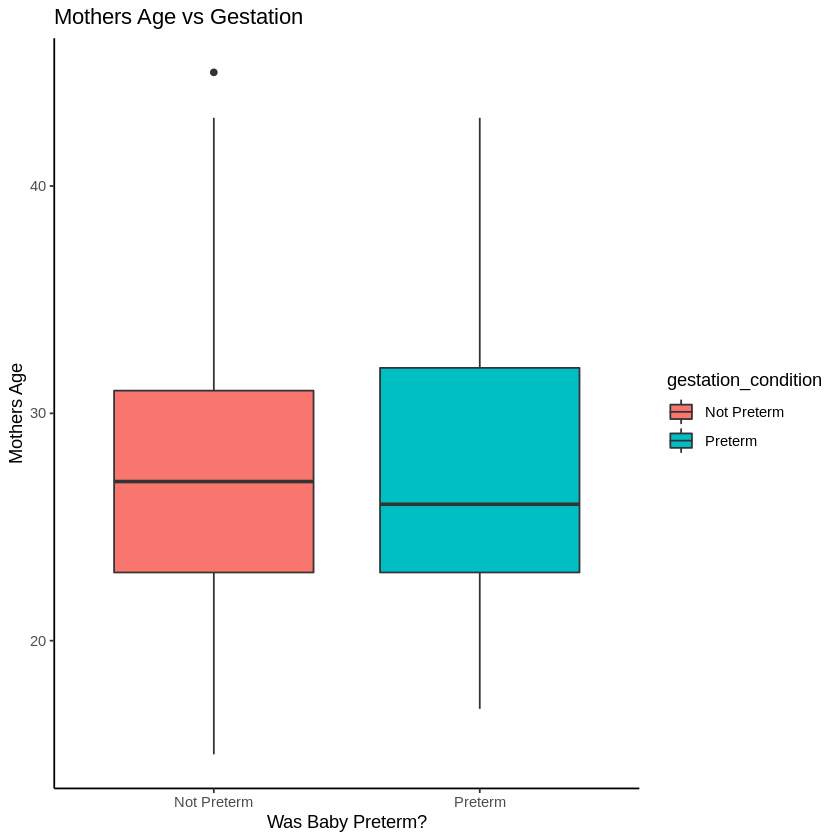

In [48]:
ggplot(babies,aes(x=gestation_condition, y=mage, fill=gestation_condition)) + geom_boxplot() + labs(title="Mothers Age vs Gestation", x="Was Baby Preterm?", y="Mothers Age") + theme_classic()

We noticed that there is little difference in the distribution of mothers age for both preterm and non-preterm babies. The median age of mothers who gave birth to preterm babies was lower than the median age of mothers who gave birth to full term babies.

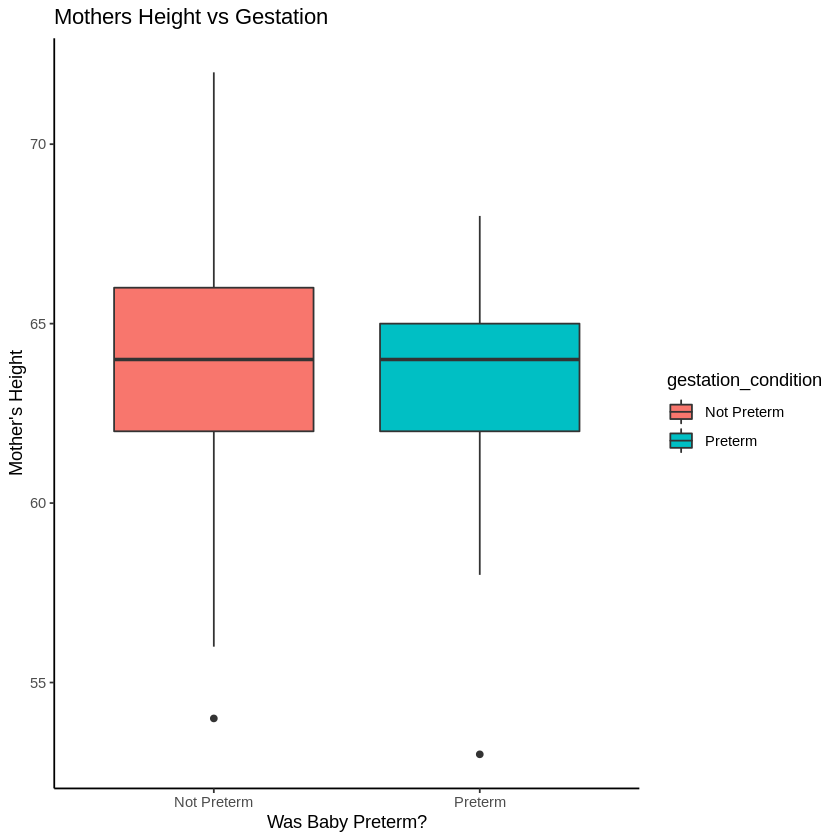

In [49]:
ggplot(babies,aes(x=gestation_condition, y=mht, fill=gestation_condition)) + geom_boxplot() + labs(title="Mothers Height vs Gestation", x="Was Baby Preterm?", y="Mother's Height") + theme_classic()

Although the median height of mothers who girth to both premature and full term babies were approximately the same, the distribution of ages was wider for mothers who gave birth to full term babies.No associative pattern was observed.

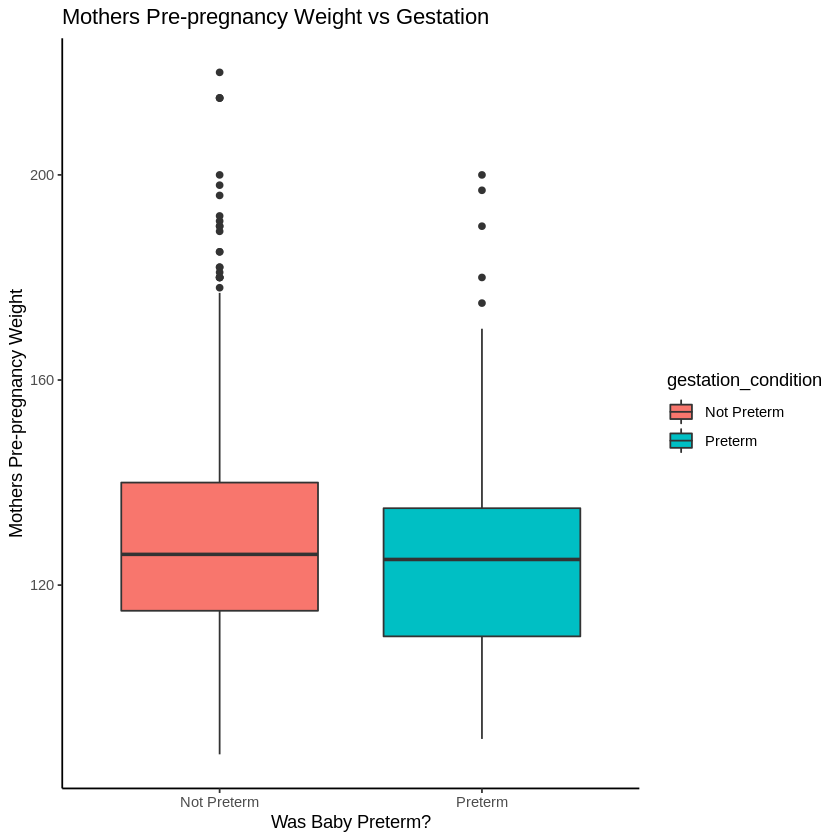

In [50]:
ggplot(babies,aes(x=gestation_condition, y=mpregwt, fill=gestation_condition)) + geom_boxplot() + labs(title="Mothers Pre-pregnancy Weight vs Gestation", x="Was Baby Preterm?", y="Mothers Pre-pregnancy Weight") + theme_classic()

Even though the distribution of pre-pregnancy weights of mothers of premature and full term babies are identical, the median pre-pregnancy weight of mothers who gave birth to preterm babies is lower than the pre-pregnancy weight of mothers who give birth to full term babies.

For categorical predictor variables, we explored joint conditional probabilities with the response variable and also carried out a Chi-squared test to determine if the two categorical variables were dependent.

In [54]:
tapply(babies$gestation_condition, babies$smoke, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","smoke")]))

$`0`
x
Not Preterm     Preterm 
  0.8347639   0.1652361 

$`1`
x
Not Preterm     Preterm 
  0.7841191   0.2158809 



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(babies[, c("gestation_condition", "smoke")])
X-squared = 3.2971, df = 1, p-value = 0.0694


For the smoke predictor variable, we noticed that the probability of giving birth to premature babies was higher (ie.22%) for smokers than the probability of giving birth to premature babies (ie.17%) for non-smokers. However, the Chi-squared test yielded a p-value of 0.0694 which meant that the two categorical variables were independent. Nevertheless, because the inferential questions we need to answer were centered around the smoking habits of mothers, we included it in our model.

In [55]:
table(babies[,c("gestation_condition","parity")])

                   parity
gestation_condition   0   1   2   3   4   5   6   7   8   9  10  11
        Not Preterm 173 175 141 101  46  36  18   8   3   4   0   0
        Preterm      36  45  32  19  15   4   4   4   0   1   2   2

The total number of previous pregnancies (ie.parity) is a discrete variable and to have an idea of the distribution its values, it would be better to use contingency table rather than a box plot.The contingency revealed lack of data for total number of previous pregnancies, including fetal deaths and still births that were larger than 4. If left unfixed, this would have produced binned residual plots that would be difficult to interpret. To solve this, parity was collapsed into five (5) categories of approximate equal number of observations. We placed mothers who had four or more previous pregnancies into a category labeled 4, all the while making no changes to the other factors.

In [56]:
babies$parity[(babies$parity > 3)] <- 4
babies$parity <- factor(babies$parity)
table(babies[,c("gestation_condition","parity")])

                   parity
gestation_condition   0   1   2   3   4
        Not Preterm 173 175 141 101 115
        Preterm      36  45  32  19  32

After, we fixed the issue, we then checked the conditional probability matrix and carried out the Chi-squared test.

In [57]:
tapply(babies$gestation_condition, babies$parity, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","parity")]))

$`0`
x
Not Preterm     Preterm 
  0.8277512   0.1722488 

$`1`
x
Not Preterm     Preterm 
  0.7954545   0.2045455 

$`2`
x
Not Preterm     Preterm 
  0.8150289   0.1849711 

$`3`
x
Not Preterm     Preterm 
  0.8416667   0.1583333 

$`4`
x
Not Preterm     Preterm 
  0.7823129   0.2176871 



	Pearson's Chi-squared test

data:  table(babies[, c("gestation_condition", "parity")])
X-squared = 2.2754, df = 4, p-value = 0.6853


The p-value of a Chi-squared test between gestation and total number of previous pregnancies revealed independence. Thus, parity was not considered when carrying out model building.

In [58]:
tapply(babies$gestation_condition, babies$mrace, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","mrace")]))

$`0`
x
Not Preterm     Preterm 
  0.8386581   0.1613419 

$`6`
x
Not Preterm     Preterm 
       0.76        0.24 

$`7`
x
Not Preterm     Preterm 
  0.7337278   0.2662722 

$`8`
x
Not Preterm     Preterm 
  0.6764706   0.3235294 

$`9`
x
Not Preterm     Preterm 
 0.93333333  0.06666667 


Warning message in chisq.test(table(babies[, c("gestation_condition", "mrace")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(babies[, c("gestation_condition", "mrace")])
X-squared = 15.628, df = 4, p-value = 0.003561


The Chi-squared test between gestation and mother's race revealed that the two variables were dependent. So we included mother's race in our model

We then explored the relationship mother's education (med) as a predictor variable.

In [59]:
tapply(babies$gestation_condition, babies$med, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","med")]))

$`0`
x
Not Preterm     Preterm 
        0.6         0.4 

$`1`
x
Not Preterm     Preterm 
  0.7230769   0.2769231 

$`2`
x
Not Preterm     Preterm 
  0.8099688   0.1900312 

$`3`
x
Not Preterm     Preterm 
  0.7659574   0.2340426 

$`4`
x
Not Preterm     Preterm 
  0.8817734   0.1182266 

$`5`
x
Not Preterm     Preterm 
  0.8301887   0.1698113 

$`6`
x
Not Preterm     Preterm 
       0.25        0.75 


Warning message in chisq.test(table(babies[, c("gestation_condition", "med")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(babies[, c("gestation_condition", "med")])
X-squared = 23.888, df = 6, p-value = 0.0005476


The conditional probability matrix of mothers education revealed a telling trend. That is, the higher the educational level of a mother, the lower the probability that she would give birth to a preterm baby. Also, the p-value showed that these two variables are dependent on some level

We explored whether interaction between mother's pre-pregnancy weight and smoking habits had an associative effect on the chances of mothers giving birth to preterm babies.

In [60]:
table(babies[,c("gestation_condition", "smoke", "med")])
table(babies[,c("gestation_condition", "smoke", "med")])/sum(table(babies[,c("gestation_condition", "smoke", "med")]))
apply(table(babies[,c("gestation_condition", "smoke", "med")])/sum(table(babies[,c("gestation_condition", "smoke", "med")])),3, function(x) x/sum(x))

, , med = 0

                   smoke
gestation_condition   0   1
        Not Preterm   3   0
        Preterm       0   2

, , med = 1

                   smoke
gestation_condition   0   1
        Not Preterm  34  60
        Preterm      15  21

, , med = 2

                   smoke
gestation_condition   0   1
        Not Preterm 145 115
        Preterm      26  35

, , med = 3

                   smoke
gestation_condition   0   1
        Not Preterm  12  24
        Preterm       7   4

, , med = 4

                   smoke
gestation_condition   0   1
        Not Preterm 111  68
        Preterm      11  13

, , med = 5

                   smoke
gestation_condition   0   1
        Not Preterm  83  49
        Preterm      16  11

, , med = 6

                   smoke
gestation_condition   0   1
        Not Preterm   1   0
        Preterm       2   1


, , med = 0

                   smoke
gestation_condition           0           1
        Not Preterm 0.003452244 0.000000000
        Preterm     0.000000000 0.002301496

, , med = 1

                   smoke
gestation_condition           0           1
        Not Preterm 0.039125432 0.069044879
        Preterm     0.017261220 0.024165708

, , med = 2

                   smoke
gestation_condition           0           1
        Not Preterm 0.166858458 0.132336018
        Preterm     0.029919448 0.040276180

, , med = 3

                   smoke
gestation_condition           0           1
        Not Preterm 0.013808976 0.027617952
        Preterm     0.008055236 0.004602992

, , med = 4

                   smoke
gestation_condition           0           1
        Not Preterm 0.127733026 0.078250863
        Preterm     0.012658228 0.014959724

, , med = 5

                   smoke
gestation_condition           0           1
        Not Preterm 0.095512083 0.056386651
        Preterm    

0,1,2,3,4,5,6
0.6,0.2615385,0.45171340,0.25531915,0.54679803,0.52201258,0.25
0.0,0.1153846,0.08099688,0.14893617,0.05418719,0.10062893,0.50
0.0,0.4615385,0.35825545,0.51063830,0.33497537,0.30817610,0.00
0.4,0.1615385,0.10903427,0.08510638,0.06403941,0.06918239,0.25


We observed some noticeable interaction between mothers pre-pregnancy weight and smoking habits so we included the interaction in our baseline model.

At the end of EDA, we identified the following predictor variables as being likely to have some associative relationship with whether a baby would be born premature or full term; mothers pre-pregnancy weight(mpregwt), smoking habits of mothers(smoke), mothers race(mrace) and mothers education(med).

## Model

### Model Fitting (Baseline Model)
We first built a baseline model with the predictor variables we identified from our EDA.

In [61]:
baseline_model <- glm(gestation ~ smoke + mpregwt_c + mrace + med + mpregwt_c:smoke, family=binomial(link=logit),data=babies)
summary(baseline_model)


Call:
glm(formula = gestation ~ smoke + mpregwt_c + mrace + med + mpregwt_c:smoke, 
    family = binomial(link = logit), data = babies)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7210  -0.6754  -0.5543  -0.4116   2.3673  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.863451   0.941150  -0.917 0.358911    
smoke1            0.271247   0.186223   1.457 0.145234    
mpregwt_c        -0.007838   0.006634  -1.181 0.237419    
mrace6            0.166762   0.517459   0.322 0.747247    
mrace7            0.761256   0.223222   3.410 0.000649 ***
mrace8            0.938638   0.409973   2.290 0.022049 *  
mrace9           -0.740002   1.051652  -0.704 0.481646    
med1             -0.550946   0.949627  -0.580 0.561799    
med2             -0.904327   0.941476  -0.961 0.336783    
med3             -0.723899   0.994039  -0.728 0.466467    
med4             -1.550466   0.956412  -1.621 0.104990    
med5             -1.066512

### Model Diagnostics (Baseline Model)

In diagnosing our baseline model, we first made binned residual plots vs the fitted values of the entire baseline model.


In [62]:
rawresid1 <- residuals(baseline_model,"resp")
binnedplot(x=fitted(baseline_model), y=rawresid1, xlab="Pred. probabilities", col.int = "red4", ylab="Avg. residuals", main="Binned Residual Plot of Baseline Model", col.pts="navy")

ERROR: ignored

## Model

### Model Fitting


Call:
lm(formula = bwt.oz ~ smoke + mrace, data = babies)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.435 -10.736   0.264  10.565  56.565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.7357     0.9005 138.513  < 2e-16 ***
smoke1       -9.5534     1.1789  -8.104 1.81e-15 ***
mrace6        0.4771     3.5119   0.136    0.892    
mrace7       -7.3008     1.4884  -4.905 1.12e-06 ***
mrace8      -12.7657     3.0332  -4.209 2.84e-05 ***
mrace9       -2.2917     4.4958  -0.510    0.610    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.16 on 863 degrees of freedom
Multiple R-squared:  0.1019,	Adjusted R-squared:  0.09672 
F-statistic: 19.59 on 5 and 863 DF,  p-value: < 2.2e-16


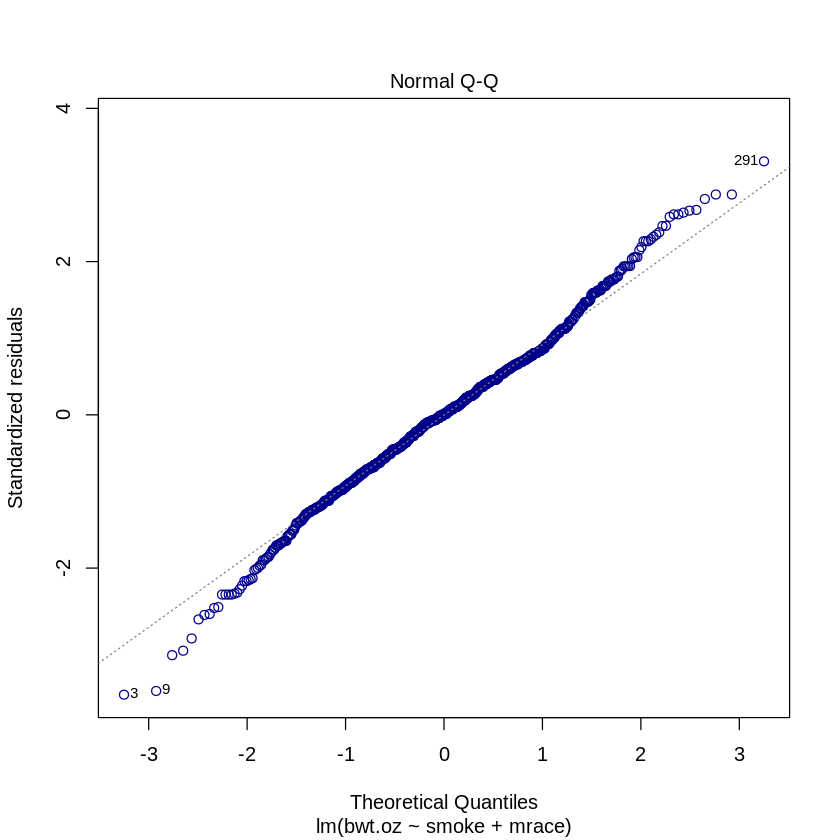

### Model Selection




Call:
lm(formula = bwt.oz ~ smoke + mht + mrace + mpregwt + parity, 
    data = babies)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.969  -9.525  -0.336  10.131  50.206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.64712   15.38492   3.227 0.001298 ** 
smoke1      -9.35194    1.15218  -8.117 1.65e-15 ***
mht          0.93387    0.26070   3.582 0.000360 ***
mrace6       3.29715    3.46725   0.951 0.341902    
mrace7      -8.82690    1.51623  -5.822 8.22e-09 ***
mrace8      -7.93888    3.03506  -2.616 0.009060 ** 
mrace9      -1.98421    4.38639  -0.452 0.651126    
mpregwt      0.10808    0.03217   3.360 0.000814 ***
parity       0.66507    0.31422   2.117 0.034584 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.71 on 860 degrees of freedom
Multiple R-squared:  0.1514,	Adjusted R-squared:  0.1435 
F-statistic: 19.17 on 8 and 860 DF,  p-value: < 2.2e-16


### Assessment of Selected Model



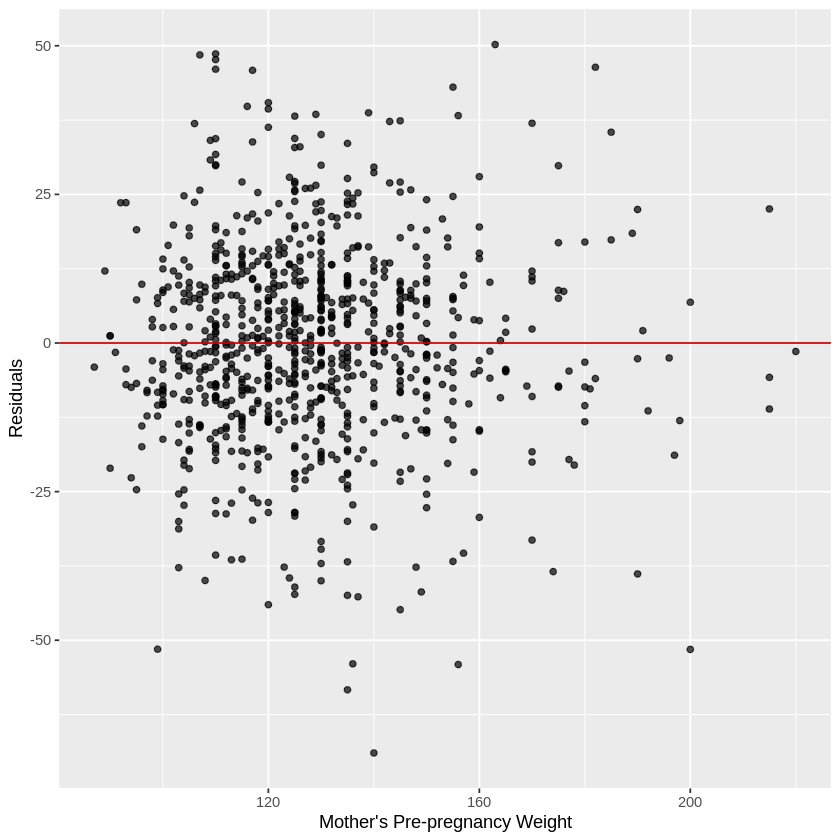

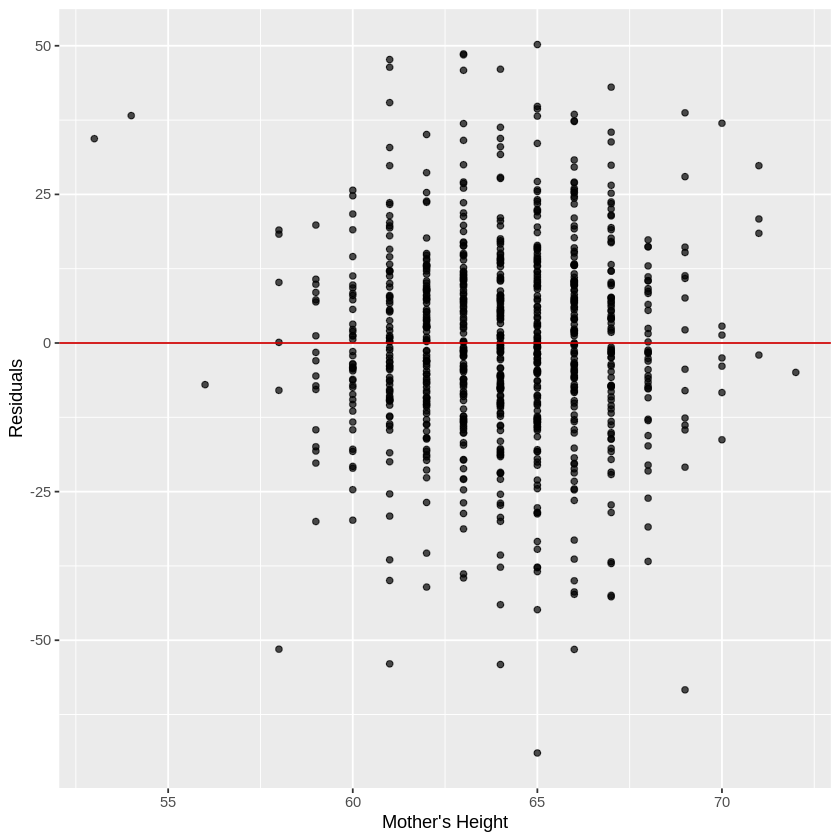

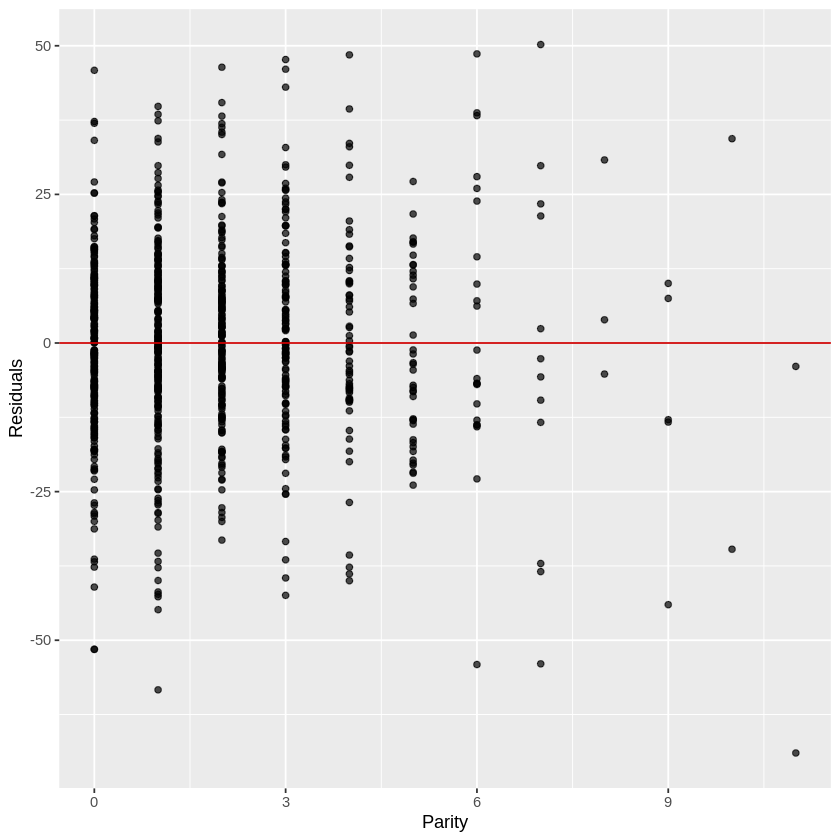

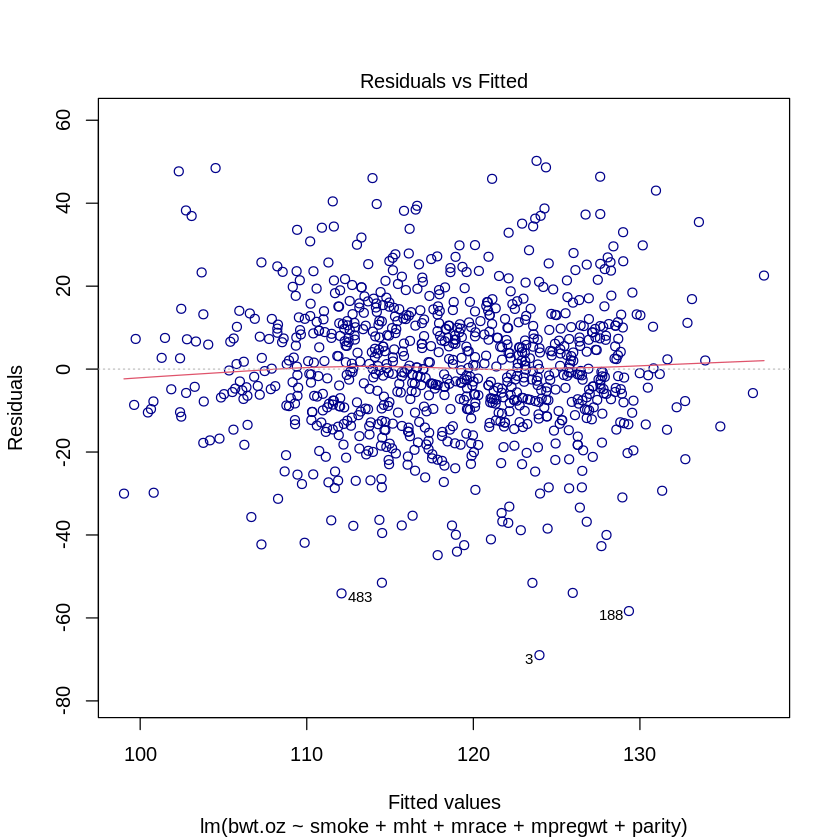

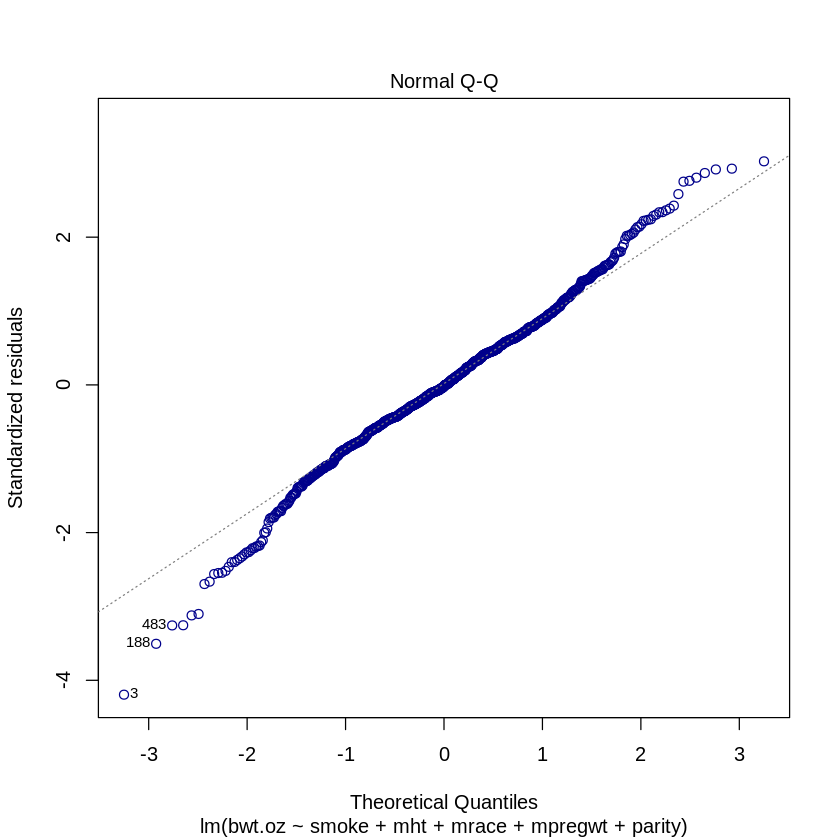

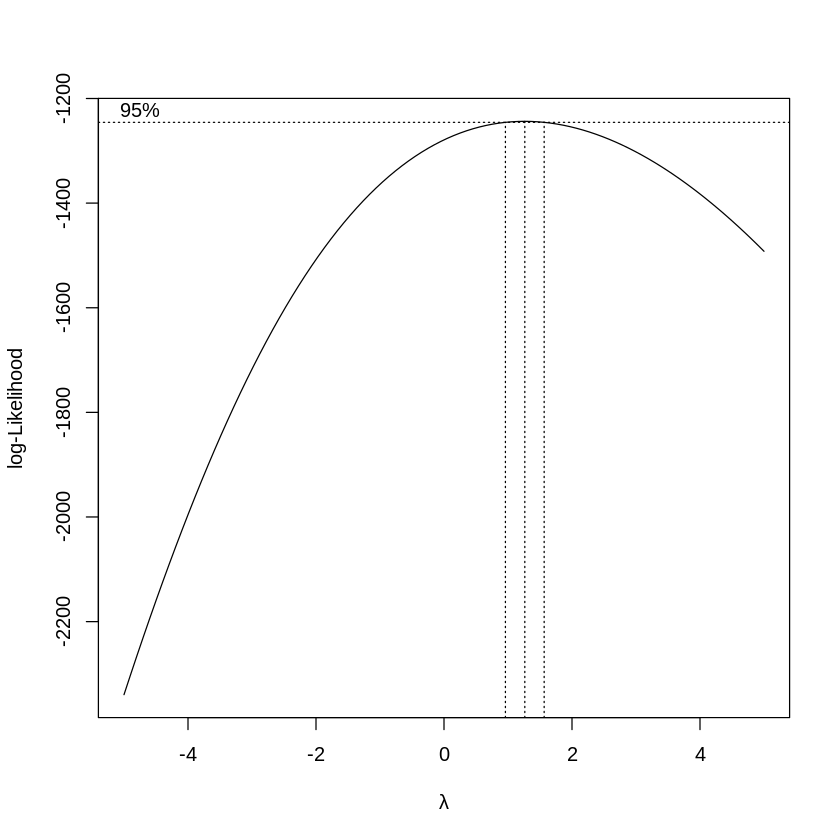

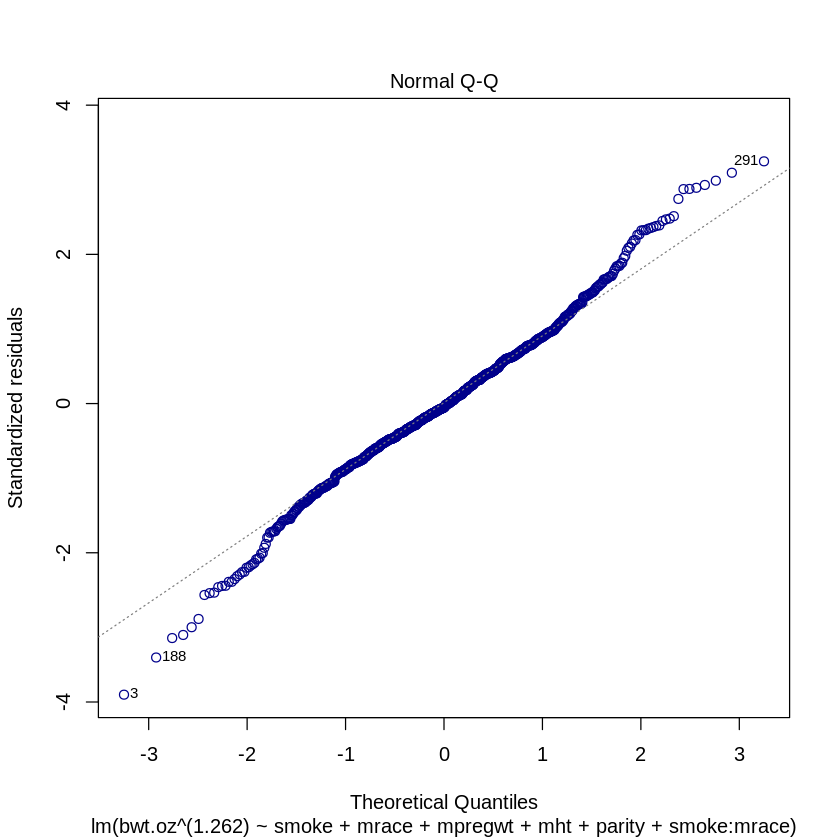

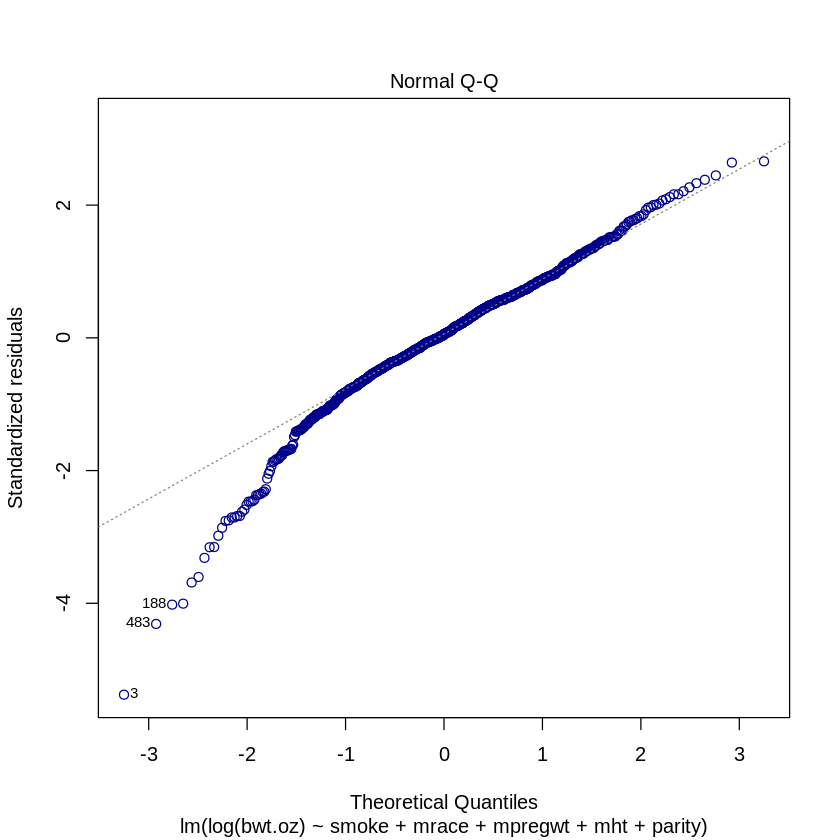

To determine the final model, we juxtaposed the qq plot of the model derived from box cox transformation of the response variable and the qq plot of the model derived from a natural logarithmic transformation of the response variable.

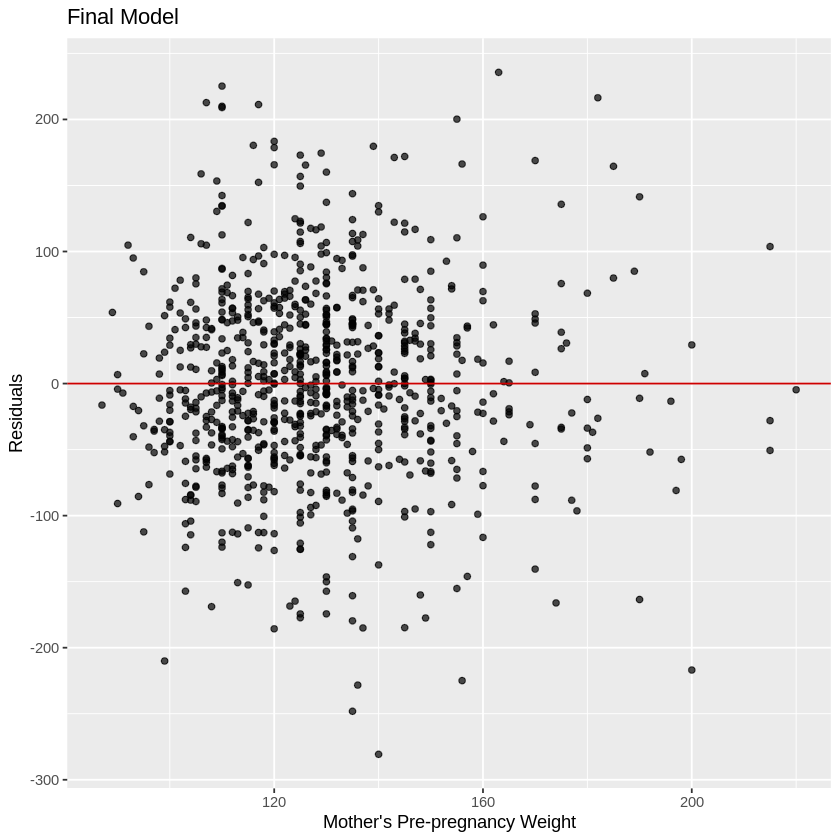

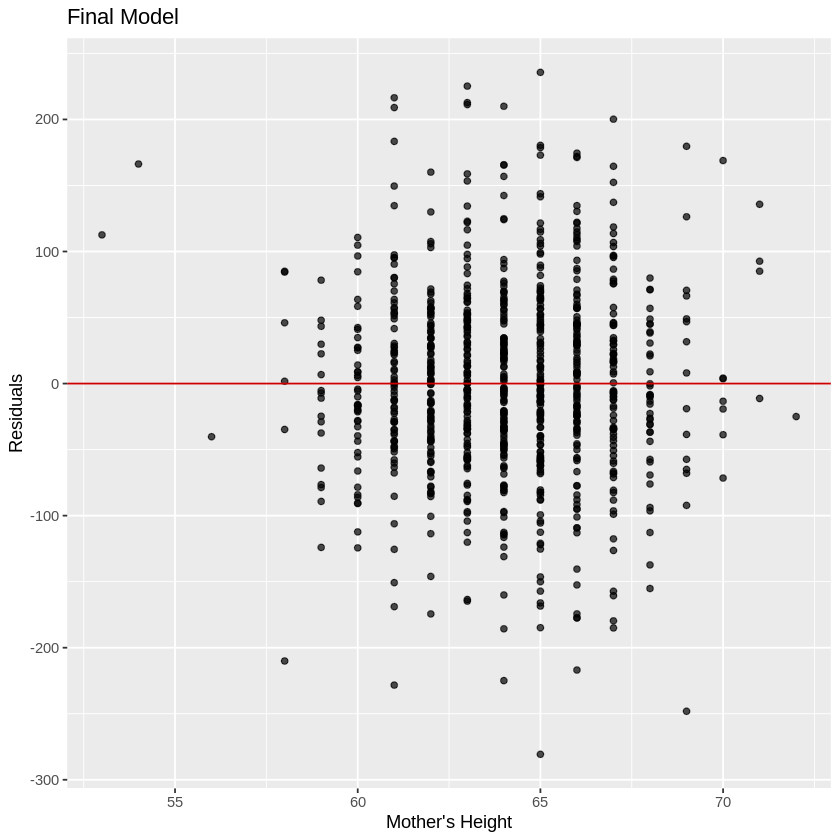

In [32]:
ggplot(log_model, aes(x=mht, y=trans_model_forward$residual)) + geom_point(alpha=0.7) + geom_hline(yintercept = 0, col="red3") + labs(title="Final Model",y="Residuals", x="Mother's Height")

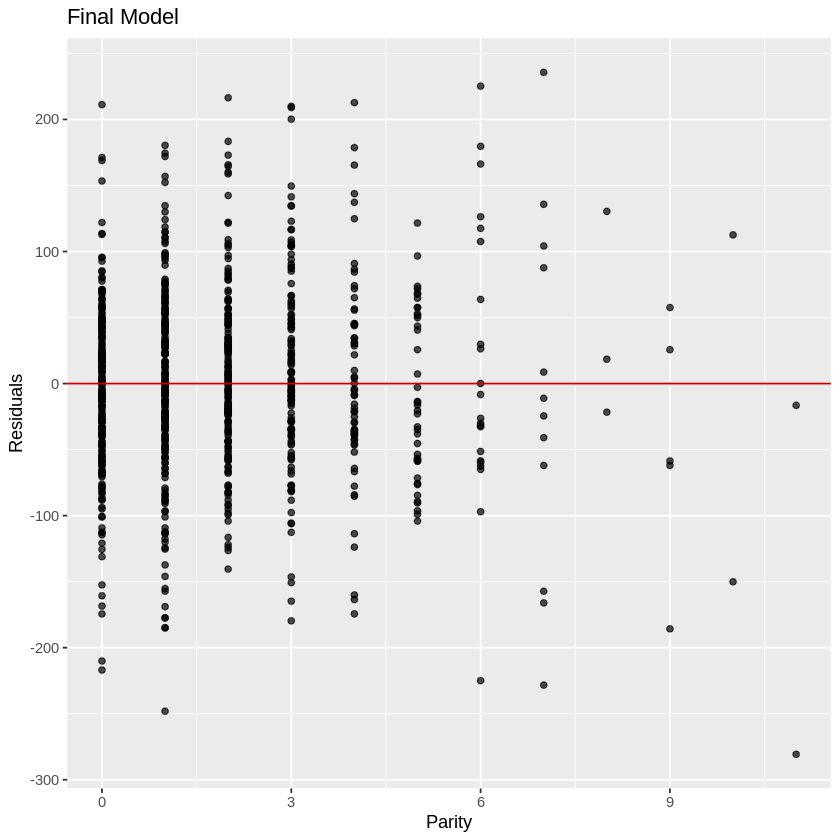

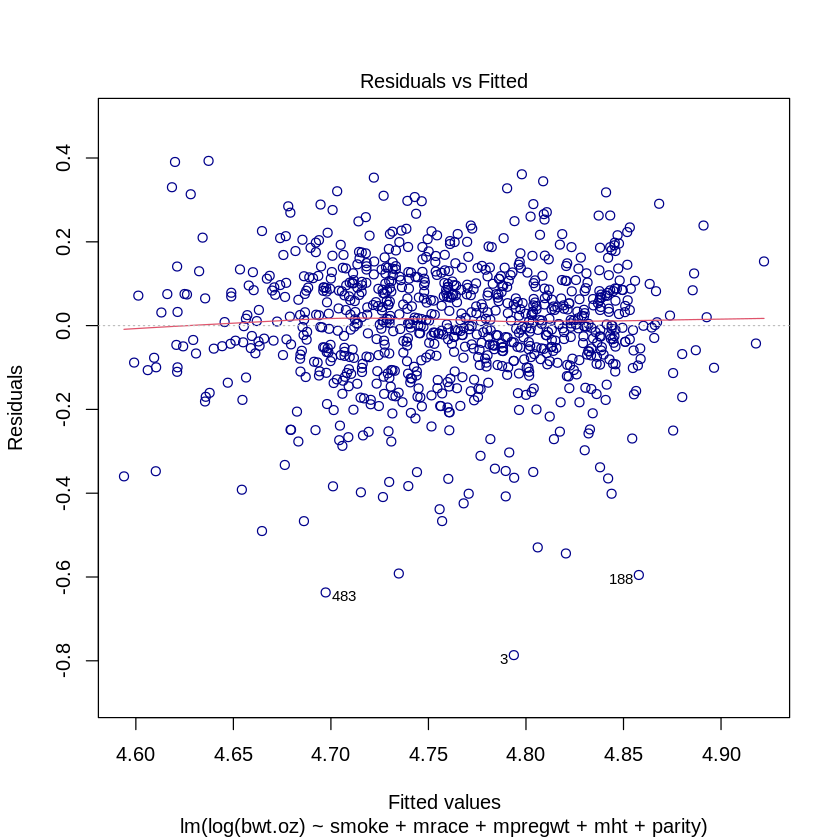

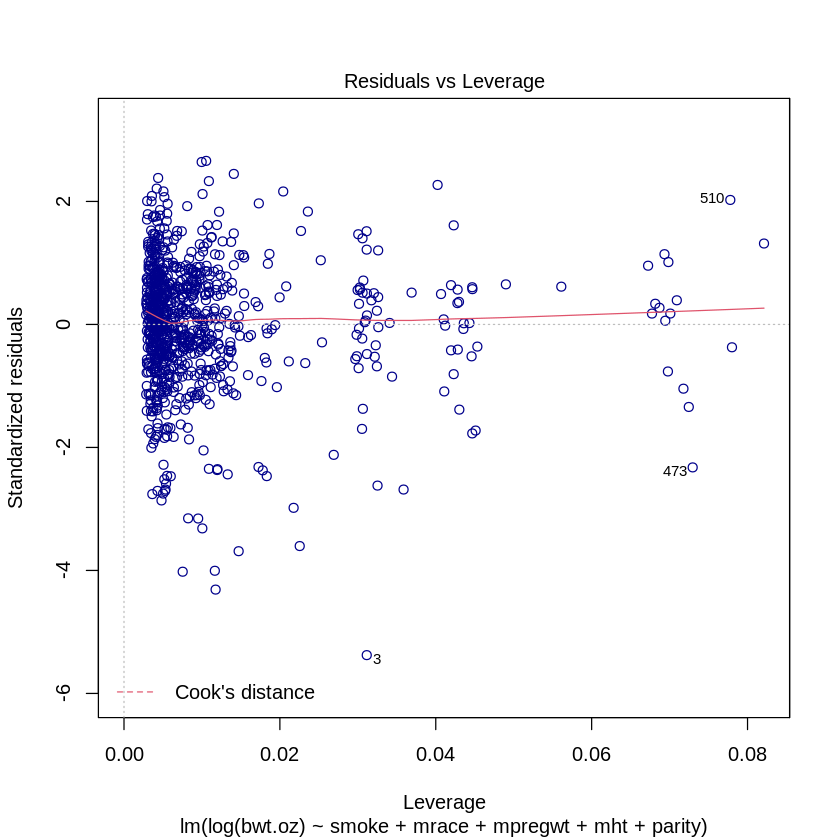

ERROR: ignored